Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399 <br>
Curso: Ciência da Computação <br>

In [30]:
# importando os módulos
import pandas as pd # manipulação dos dados tabulares
import numpy as np # manipulação algébrica

from sklearn.model_selection import train_test_split # dividir os dados em treino e teste
from sklearn.neighbors import KNeighborsRegressor # criar o modelo KNN

# bibliotecas para a visualização de dados
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('fivethirtyeight')

In [31]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

In [32]:
def get_neighbors(X_train,test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[:k]

### 1. Altere nossa implementação de kNN para que ela possa calcular regressão. Dica: crie uma função predict_regression baseada na função predict_classification do documento notebook 02-Aula kNN.ipynb.

In [33]:
def predict_regression(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    return round(np.mean(output_values), 1)

### 2. Use os seguintes dados como dados de treino (X_treino) para o kNN, onde House Price Index é o nosso rótulo (label ou y_treino):

![data](data.png)

In [34]:
# criando o data frame
df = pd.DataFrame({'Age' : [25, 35, 45, 20, 35, 52, 23, 40, 60, 48, 33],
'Loan' : [40000.0, 60000.0, 80000.0, 20000.0, 120000.0, 18000.0, 95000.0, 62000.0, 100000.0, 220000.0, 150000.0],
'House Price Index' : [135, 256, 231, 267, 139, 150, 127, 216,139, 250, 264]})

In [35]:
# visão geral do df
df

,Age,Loan,House Price Index
0,25,40000.0,135
1,35,60000.0,256
2,45,80000.0,231
3,20,20000.0,267
4,35,120000.0,139
5,52,18000.0,150
6,23,95000.0,127
7,40,62000.0,216
8,60,100000.0,139
9,48,220000.0,250


In [36]:
# separando as features
X_treino = df[['Age', 'Loan']].values
y_treino =  df['House Price Index'].values

### Use a implementação de regressão para o kNN implementada na Questão 1 para:

#### a) Calcular o rótulo para quando Age = 42 e Loan = $142,000.

In [37]:
predict_regression(X_treino, y_treino, [42, 142000], 3)

180.7

#### b) Calcular o rótulo para quando Age = 30 e Loan = $50,000.



In [38]:
predict_regression(X_treino, y_treino, [30, 50000], 3)

202.3

### 3. O conjunto de dados de qualidade de vinho consiste na predição da qualidade de vinhos brancos sobre uma escala dada medições químicas de cada vinho. Baixe o conjunto de qualidade de vinho e faça o seguinte com ele em um Jupyter Notebook:

In [39]:
# leitura dos dados
df_wine = pd.read_csv('../Lista-04/winequality-white.csv', sep=';')

In [40]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 3.1. Separe 70% dos dados para treino (conjunto de treino) e 30% dos dados para teste (conjunto de teste).

In [41]:
# separando os valores das features e a varíável target
X = df_wine.iloc[:, :11]
y = df_wine.iloc[:, -1]

In [42]:
# dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 3.2. Crie um modelo de regressão de qualidade de vinho usando o kNN para k=5.

In [43]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

### 3.3. Use o modelo de regressão sobre X_test para calcular os valores preditos dos rótulos (y_pred).

In [44]:
# treinando o modelo
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [45]:
# valores preditos
knn_regressor.predict(X_test)

array([6.4, 6.4, 6.4, ..., 5.6, 6.4, 6.2])

O método **score** retorna o coeficiente de determinação da previsão. A melhor pontuação possível é 1.0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

In [46]:
knn_regressor.score(X_test, y_test)

0.14751756939021798

### Escalonando os valores

#### <i> Min-Max Scalling </i>
$$ x = \frac{x - min(x)}{max(x) - min(x)} $$

In [47]:
# uso os valores min e max do conjunto de dados de treino para escalonar os valores das features de teste com 
# o intuito de evitar vasão de dados 
X_mtrain = (X_train - X_train.min())/(X_train.max() - X_train.min())
X_mtest = (X_test - X_train.min())/(X_train.max() - X_train.min())

In [48]:
X_mtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
627,0.307692,0.235294,0.144578,0.085890,0.115727,0.101045,0.508121,0.165606,0.427184,0.465116,0.225806
3493,0.211538,0.196078,0.162651,0.228528,0.080119,0.101045,0.290023,0.134374,0.388350,0.255814,0.806452
3831,0.288462,0.225490,0.114458,0.044479,0.228487,0.097561,0.280742,0.113553,0.038835,0.255814,0.258065
833,0.298077,0.166667,0.204819,0.010736,0.077151,0.087108,0.169374,0.064392,0.378641,0.255814,0.677419
963,0.221154,0.107843,0.150602,0.052147,0.041543,0.073171,0.238979,0.100058,0.563107,0.337209,0.580645


In [49]:
# criando o modelo do KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [50]:
# treinando o modelo
knn_regressor.fit(X_mtrain, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [51]:
# realização da predição
knn_regressor.predict(X_mtest)

array([6.8, 5.6, 6.8, ..., 6.2, 5. , 6.4])

In [52]:
knn_regressor.score(X_mtest, y_test)

0.3295762050117129

#### <i> Standardization (Variance Scalling) </i>

$$ x = \frac{x - mean(x)}{\sigma(x)} $$

In [53]:
# uso os valores da média e do desvio padrão referente ao conjunto de dados de treino para escalonar 
# os valores das features de teste com o intuito de evitar vasão de dados 
X_vtrain = (X_train - X_train.mean())/X_train.std()
X_vtest = (X_test - X_train.mean())/X_train.std()

In [54]:
X_vtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
627,0.175001,0.429599,-0.771171,-0.031881,0.099952,-0.259177,2.092351,0.554437,0.261096,1.148786,-0.905056
3493,-0.997943,0.030543,-0.523367,1.783883,-0.453059,-0.259177,-0.102937,0.015607,-0.002053,-0.429727,2.043022
3831,-0.059588,0.329835,-1.184178,-0.559038,1.851155,-0.316954,-0.196354,-0.343613,-2.370394,-0.429727,-0.741274
833,0.057706,-0.268749,0.054843,-0.988574,-0.499143,-0.490284,-1.317352,-1.191772,-0.067841,-0.429727,1.387894
963,-0.880649,-0.867333,-0.688570,-0.461416,-1.052155,-0.721390,-0.616728,-0.576441,1.182117,0.184139,0.896547


In [55]:
# criando o modelo do KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [56]:
# treinando o modelo
knn_regressor.fit(X_vtrain, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [57]:
# realização da predição
knn_regressor.predict(X_vtest)

array([6.4, 5.6, 7. , ..., 6.2, 5. , 6.2])

In [58]:
knn_regressor.score(X_vtest, y_test)

0.36307304607084556

In [ ]:
sns.regplot()

### Comparação dos diferentes métodos de escalonamento

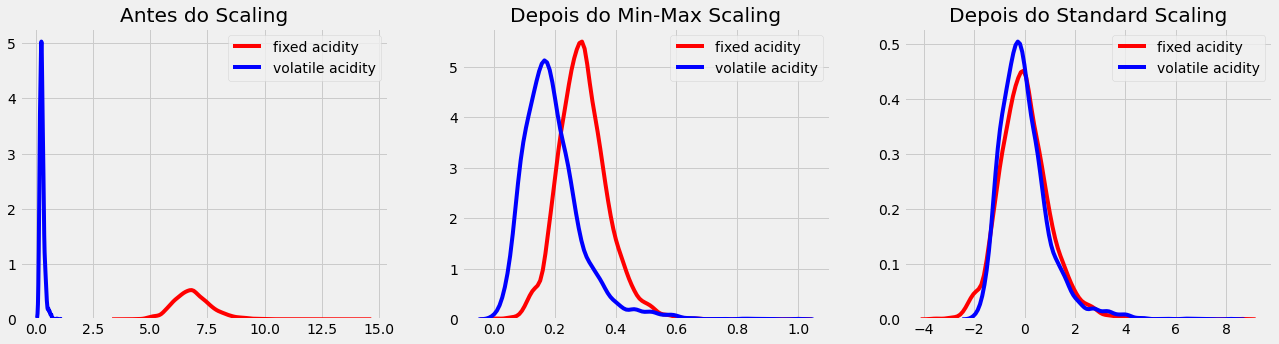

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
ax1.set_title('Antes do Scaling')

sns.kdeplot(X_train['fixed acidity'], ax=ax1, color='red')
sns.kdeplot(X_train['volatile acidity'], ax=ax1, color='blue')
ax2.set_title('Depois do Min-Max Scaling')

sns.kdeplot(X_mtrain['fixed acidity'], ax=ax2, color='red')
sns.kdeplot(X_mtrain['volatile acidity'], ax=ax2, color='blue')
ax3.set_title('Depois do Standard Scaling')
  
sns.kdeplot(X_vtrain['fixed acidity'], ax=ax3, color='red')
sns.kdeplot(X_vtrain['volatile acidity'], ax=ax3, color='blue')

plt.show();